### Important libraries
* $\textbf{NumPy}$ forms the foundations by providing a basic array data type (think of vectors and matrices) and functions for acting on these arrays (e.g., matrix multiplication).

* $\textbf{SciPy}$ builds on NumPy by adding the kinds of numerical methods that are routinely used in science (interpolation, optimization, root finding, etc.).

* $\textbf{Matplotlib}$ is used to generate figures, with a focus on plotting data stored in NumPy arrays.

* $\textbf{Pandas}$ provides types and functions for empirical work (e.g., manipulating data).


QuantEcon page has a comparision between Python and other languages in speed:
https://python.quantecon.org/need_for_speed.html

### NumPy

#### Array

In [1]:
import numpy as np
a = np.zeros(3)
a

array([0., 0., 0.])

In [2]:
type(a)

numpy.ndarray

Data must be homogeneous in an array. Some common types are
* float64
* int64
* bool: 8 bit boolean

In [3]:
type(a[0])

numpy.float64

In [4]:
a = np.zeros(3, dtype = int)
type(a[0])

numpy.int32

#### Dimension

Dimension is saved in the `shape` attribute

In [5]:
a.shape

(3,)

In [6]:
type(a.shape)

tuple

We can create arrays with `np.zeros`, `np.ones`, `np.empty` etc. or create from Python lists, tuple using `np.array` and change the dimension using `.shape`

In [7]:
a = np.ones(4)
a.shape = (2,2) # give .shape tuple
a

array([[1., 1.],
       [1., 1.]])

In [8]:
a = np.array([1, 2, 3, 4],dtype = float)
a.shape = (2,2)
a

array([[1., 2.],
       [3., 4.]])

#### Indexing

In [9]:
a = np.linspace(1,2,5) # from 1 to 2, evenly spaced 5 numbers
a

array([1.  , 1.25, 1.5 , 1.75, 2.  ])

We can access elements of an array through an array of index or boolean.

In [10]:
a = np.linspace(1,5,5)
a

array([1., 2., 3., 4., 5.])

In [11]:
indices = np.array([0,3,4])
a[indices]

array([1., 4., 5.])

In [12]:
indices = np.array([1,0,0,1,1], dtype = bool)
a[indices]

array([1., 4., 5.])

In [13]:
a = np.array([1, 2, 3, 4],dtype = float)
a.shape = (2,2)

In [14]:
a[0,0]

1.0

In [15]:
a[0,:]

array([1., 2.])

In [16]:
a[:,1]

array([2., 4.])

In [17]:
a = np.linspace(0,5,6)
a

array([0., 1., 2., 3., 4., 5.])

In [18]:
a[0:2]

array([0., 1.])

#### Methods

In [19]:
a = np.array((4, 3, 2, 1))
a.sort()              # Sorts a in place
a

array([1, 2, 3, 4])

In [20]:
a.sum()               # Sum
a.mean()              # Mean
a.max()               # Max
a.argmax()            # Returns the index of the maximal element
a.var()               # Variance

1.25

Many of these methods have equivalent functions in the Numpy namespace.

#### Operations

The operations act element-wise on arrays. `+`,`-`,`*`,`/`,`**`

In [21]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])
a + b

array([ 6,  8, 10, 12])

In [22]:
a + 10

array([11, 12, 13, 14])

In [23]:
a.shape = (2,2)
b.shape = (2,2)
a * b

array([[ 5, 12],
       [21, 32]])

This is not the matrix multiplication. If we want to do matrix multiplication. we can do the following:

In [24]:
a @ b

array([[19, 22],
       [43, 50]])

In [25]:
a @ (1,2) # here a Python tuple or list is treated as a vector.

array([ 5, 11])

#### Mutability


In [26]:
a = np.ones(5)
b = a
b[0] = 2

In [27]:
b

array([2., 1., 1., 1., 1.])

In [28]:
a

array([2., 1., 1., 1., 1.])

We are passing around pointers to data, rather than making copies. Because making copies is expensive in terms of speed and memory. But, if you do want to make a copy, you can use `np.copy`.

In [29]:
a = np.ones(5)
b = np.copy(a)
b[0] = 2
print(a,b)

[1. 1. 1. 1. 1.] [2. 1. 1. 1. 1.]


#### Additional methods

NumPy provides versions of the standard functions log, exp, sin, etc. that act element-wise on arrays

In [30]:
z = np.array([1, 2, 3])
np.sin(z)

array([0.84147098, 0.90929743, 0.14112001])

In [31]:
a = np.random.randn(4)
a

array([ 0.57085867, -0.28116861, -0.36044148,  0.23389876])

In [32]:
np.where(a > 0, 1, 0)

array([1, 0, 0, 1])

In [33]:
a[np.where(a>0,True, False)]

array([0.57085867, 0.23389876])

In [34]:
a[a>0]

array([0.57085867, 0.23389876])

### SciPy

#### Statistics

In [35]:
import numpy as np
import matplotlib.pyplot as plt
np.random.beta(5,5,size = 3)

array([0.74984398, 0.3908428 , 0.65410778])

Sometimes, we need access to the density itself, or the cdf, the quantiles, etc. Then `scipy.stats` (a sub-package of `scipy`) becomes handy.

In [36]:
from scipy.stats import beta
q = beta(5,5)
q.rvs(3)

array([0.40437317, 0.68586768, 0.66560897])

`q` now is a distribution. It contains more methods:

In [37]:
q.cdf(0.4)

0.26656768000000003

In [38]:
q.ppf(0.8)  

0.6339134834642708

In [39]:
q.mean()

0.5

A list of distributions can be found here:
https://docs.scipy.org/doc/scipy/reference/stats.html

`scipy.stats.linregress` can be used for simple linear regression

In [40]:
from scipy.stats import linregress

x = np.random.randn(200)
y = 2 * x + 0.1 * np.random.randn(200)

In [41]:
linregress(x, y)

LinregressResult(slope=1.9920451447097836, intercept=0.009509987779596857, rvalue=0.9986771849331, pvalue=3.593893745367198e-257, stderr=0.007288905955190191)

In [42]:
gradient, intercept, r_value, p_value, std_err = linregress(x, y)
gradient, intercept

(1.9920451447097836, 0.009509987779596857)

#### Roots finding

Suppose we want to find roots for $$f(x) = sin(4x-1)+x+x^{20}-1$$ for $x\in [0,1]$. The answer is around 0.4 from the following graph.

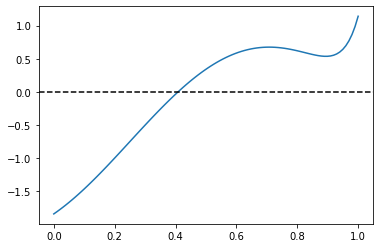

In [43]:
f = lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1 
# anonymous function syntax as:  
# lambda arguments: expression

x = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.axhline(ls='--', c='k')
plt.show()

We can use bisection method provided by `scipy.optimize.bisect`

In [44]:
from scipy.optimize import bisect
bisect(f,0,1)

0.4082935042806639

Newton-Raphson Method is also available.

In [45]:
from scipy.optimize import newton

newton(f, 0.2)

0.40829350427935673

In [46]:
newton(f, 0.7)

0.7001700000000279

For multivariate cases, there is `scipy.optimize.fsolve`. Can see documentation for details. 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html

#### Optimization

In [47]:
from scipy.optimize import fminbound
fminbound(lambda x: x**2, -1, 2)  # Search in [-1, 2]

0.0

### Matplotlib

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

`%matplotlib inline` is used to make sure the plots appear right after the cell and be stored within the notebook. More can be found here:
https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline

#### MATLAB-style

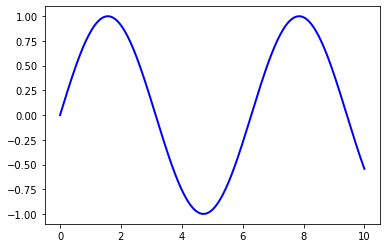

In [49]:
x = np.linspace(0, 10, 200)
y = np.sin(x)

plt.plot(x, y, 'b-', linewidth=2)
plt.show()

#### Python-style

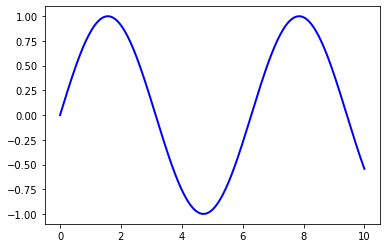

In [50]:
fig, ax = plt.subplots()
ax.plot(x, y, 'b-', linewidth=2)
plt.show()

* `fig` is a `Figure` instance—like a blank canvas.  
* `ax` is an `AxesSubplot` instance-think of a frame for plotting in.
* `plot()` is a method of `ax`

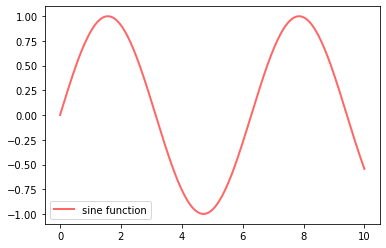

In [51]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend()
plt.show()

References:

* https://matplotlib.org/gallery.html
* http://scipy-lectures.org/intro/matplotlib/index.html
* http://tonysyu.github.io/mpltools/index.html

### Pandas

`Panda` is a package of fast, efficient data analysis tools for Python.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests

#### Series

* `Series`: a column of data, a collection of observations on a single variable.
* `DataFrame`: collection of `Series`

In [53]:
s = pd.Series(np.random.randn(4), name='daily returns')
s

0    0.613302
1    0.573825
2   -0.299830
3    1.052446
Name: daily returns, dtype: float64

In [54]:
# can do NumPy operations
s * 100

0     61.330248
1     57.382499
2    -29.983045
3    105.244642
Name: daily returns, dtype: float64

In [55]:
# and more than NumPy
s.describe()

count    4.000000
mean     0.484936
std      0.566364
min     -0.299830
25%      0.355411
50%      0.593564
75%      0.723088
max      1.052446
Name: daily returns, dtype: float64

In [56]:
# flexible in indices
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']
s

AMZN    0.613302
AAPL    0.573825
MSFT   -0.299830
GOOG    1.052446
Name: daily returns, dtype: float64

#### DataFrames

In [57]:
df = pd.read_csv('/Users/shanchao/Desktop/Programming/Python/QuantEcon Reading/test_pwt.csv')
type(df)

FileNotFoundError: [Errno 2] File b'/Users/shanchao/Desktop/Programming/Python/QuantEcon Reading/test_pwt.csv' does not exist: b'/Users/shanchao/Desktop/Programming/Python/QuantEcon Reading/test_pwt.csv'

In [ ]:
df

In [ ]:
# indices 
df[2:5]

In [ ]:
df[['country', 'tcgdp']]

In [ ]:
df['country']

In [ ]:
df.iloc[2:5, 0:4] # to select both rows and columns by number, use .iloc

In [ ]:
df.loc[df.index[2:5], ['country', 'tcgdp']] # access by number and names, use .loc

In [ ]:
# trim data frame and remove index column
df = df[['country', 'POP', 'tcgdp']]
df = df.set_index('country')
df

In [ ]:
df.columns = 'population', 'total GDP'
df

`DataFrames` and `Series` contain methods that will be handy when it comes to data visualization. For example, generate bar plot for GDP per capita.

In [ ]:
df['GDP percap'] = df['total GDP'] * 1e6 / df['population']
df = df.sort_values(by='GDP percap', ascending=False)
df['GDP percap'].plot(kind='bar')
plt.show()

We can access CSV file via Python requests library or Pandas. Example, U.S. unemployment rate (This method only works for URLs that directly access data files):

`https://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv`

In [ ]:
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
source = requests.get(url).content.decode().split("\n")
source[0:10]

In [ ]:
# easy way to parse data
data = pd.read_csv(url, index_col=0, parse_dates=True)
data.head()

In [ ]:
data['2006':'2012'].plot()
plt.show()

Pandas methods reference:
https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

To access other data source, read:
https://pandas-datareader.readthedocs.io/en/latest/index.html